In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from Getclasses import get_label_dict
import pickle
import matplotlib.pyplot as plt
from os import listdir

In [4]:
# actual_cls_mapping : maps 0, 1, 2, 3, ... to 0000, 0010, ...
with open(r'D:\Workspace\SW_academy\Project1\Service\Server&DB\actual_cls_mapping', 'rb') as fp:
    actual_cls_mapping = pickle.load(fp)
print(actual_cls_mapping)

{'0': '0000', '1': '0010', '2': '0020', '3': '0001', '4': '0011', '5': '0021', '6': '0100', '7': '0110', '8': '0120', '9': '0101', '10': '0111', '11': '0121', '12': '1000', '13': '1001', '14': '1100', '15': '1101', '16': '000', '17': '001', '18': '002', '19': '010', '20': '011', '21': '012', '22': '013', '23': '014', '24': '110', '25': '111', '26': '113', '27': '114', '28': '015', '29': '115'}


# Bed/chair cls distribution before augmentation

In [5]:
# label DataFrame for further analysis
bed = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Data\clean_bed_label'))
chair = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Data\clean_chair_label'))

In [4]:
# Number of filtered images
len(bed), len(chair)

(6107, 12812)

In [19]:
with open(r'D:\Workspace\SW_academy\Project1\bed_classes.txt', 'r') as fp:
    bed_predefined = fp.read()
with open(r'D:\Workspace\SW_academy\Project1\chair_classes.txt', 'r') as fp:
    chair_predefined = fp.read()

In [20]:
# bed_actual, chair_actual to map each classes.
bed_actual = {str(i) : v for i, v in enumerate(bed_predefined.splitlines())}
chair_actual = {str(i) : v for i, v in enumerate(chair_predefined.splitlines())}

In [9]:
# Function to apply bed_actual/chair_actual mapping.
def actual_map(x, d):
    try:
        return d[x]
    except:
        return None

In [12]:
bed_cls = bed['classes'].apply(lambda x : actual_map(x, bed_actual)).dropna()

In [13]:
bed_count = {k : v for k, v in bed_cls.value_counts().items()}

In [35]:
print(bed_count['0010'], bed_count['0020'], bed_count['0011'], bed_count['0021'])

83 95 51 96


In [15]:
chair_cls = chair['classes'].apply(lambda x : actual_map(x, chair_actual)).dropna()

In [16]:
chair_count = {k : v for k, v in chair_cls.value_counts().items()}

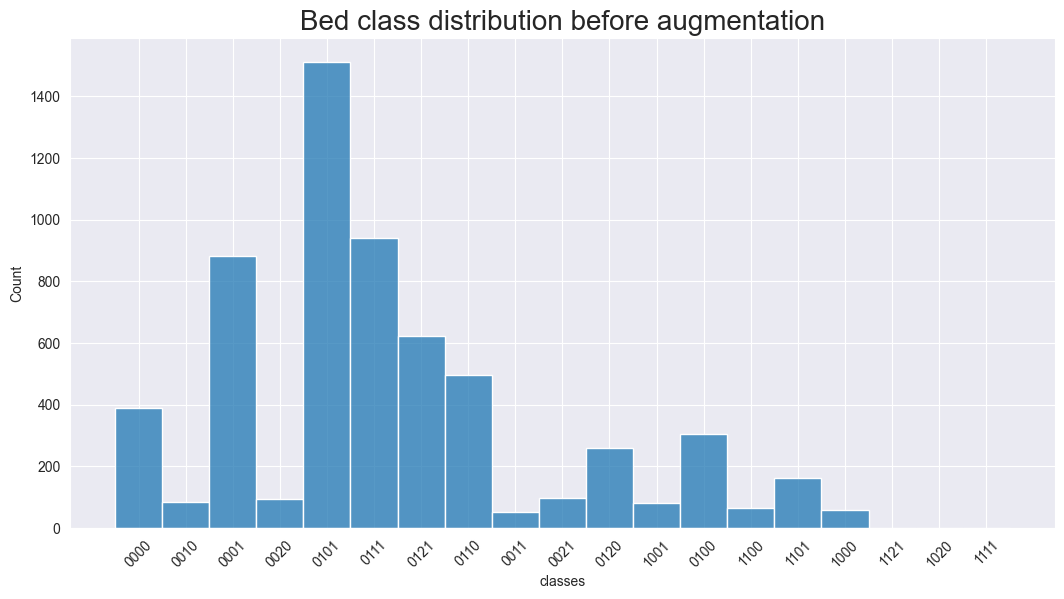

In [50]:
fig, ax = plt.subplots(figsize=(12.7, 6.36))
sns.histplot(bed_cls, ax=ax)
plt.xticks(rotation=45)
plt.title('Bed class distribution before augmentation', fontsize=20)
plt.show()

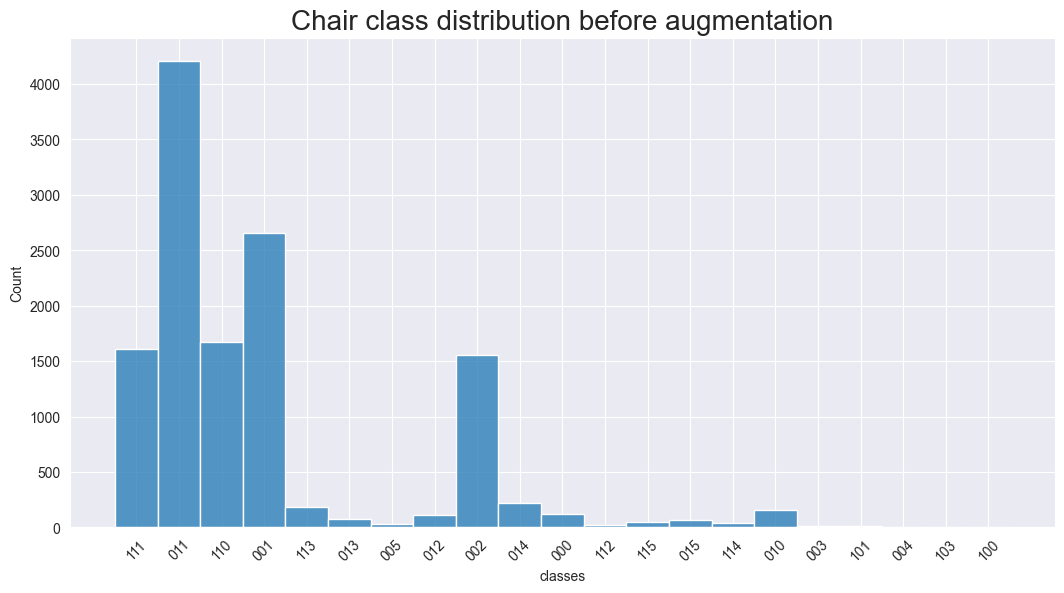

In [49]:
fig, ax = plt.subplots(figsize=(12.7, 6.36))
sns.histplot(chair_cls, ax=ax)
plt.xticks(rotation=45)
plt.title('Chair class distribution before augmentation', fontsize=20)
plt.show()

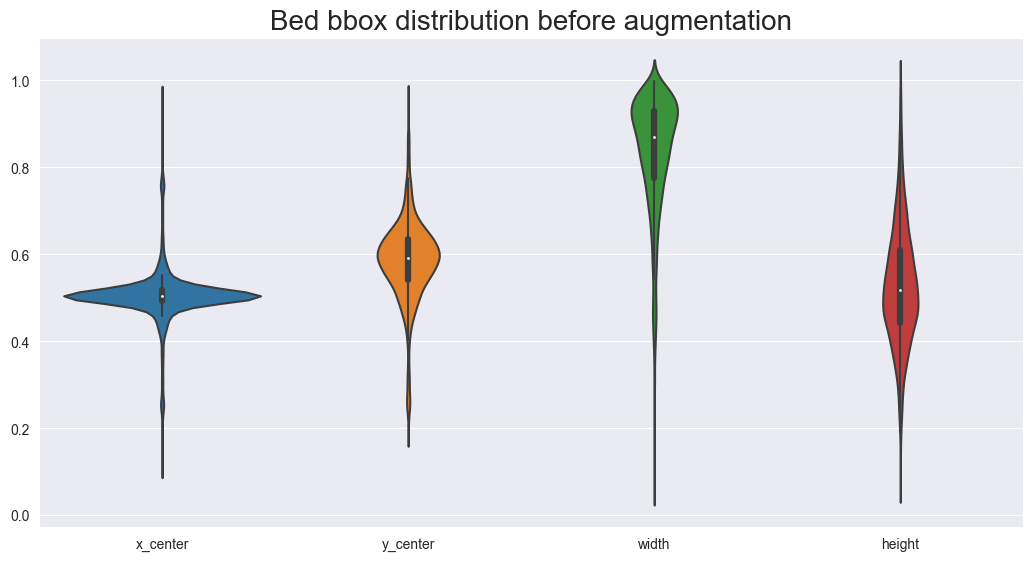

In [48]:
fig, ax = plt.subplots(figsize=(12.7, 6.36))
ax = sns.violinplot([bed['x_center'], bed['y_center'], bed['width'], bed['height']])
ax.set_xticklabels(bed.columns[1:])
plt.title('Bed bbox distribution before augmentation', fontsize=20)
plt.show()

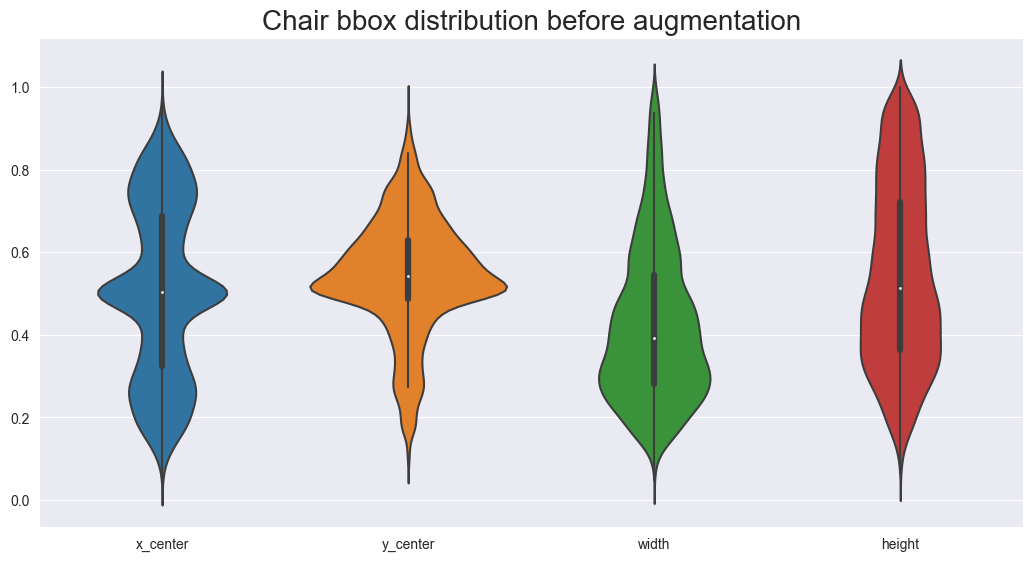

In [47]:
fig, ax = plt.subplots(figsize=(12.7, 6.36))
ax = sns.violinplot([chair['x_center'], chair['y_center'], chair['width'], chair['height']])
ax.set_xticklabels(chair.columns[1:])
plt.title('Chair bbox distribution before augmentation', fontsize=20)
plt.show()

# After augmentation

In [27]:
# cls information for the dataset after augmentation
mixed = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Src\train\labels'))

In [36]:
# test, val dataset cls information.
test_mixed = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Src\test\labels'))
val_mixed = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Src\val\labels'))

In [31]:
def actual_cls_map2(d1, d2, x):
    try:
        try:
            return d1[x]
        except:
            return d2[x]
    except:
        return None

In [37]:
# Number of total images after augmentation
len(mixed) + len(test_mixed) + len(val_mixed)

81315

In [30]:
chair_actual_p24 = {str(int(k) + 24):v for k, v in chair_actual.items()}

In [32]:
mix_cls = mixed['classes'].apply(lambda x : actual_cls_map2(bed_actual, chair_actual_p24, x)).dropna()

In [55]:
final_bed_cls = mixed['classes'][mixed['classes'].apply(lambda x: len(x) == 4)]

In [33]:
# sorting
temp = {k : v for k, v in mixed['classes'].value_counts().items()}
temp = {k : v for k, v in sorted([(k, v) for k, v in temp.items()], key=lambda x: int(x[0]))}

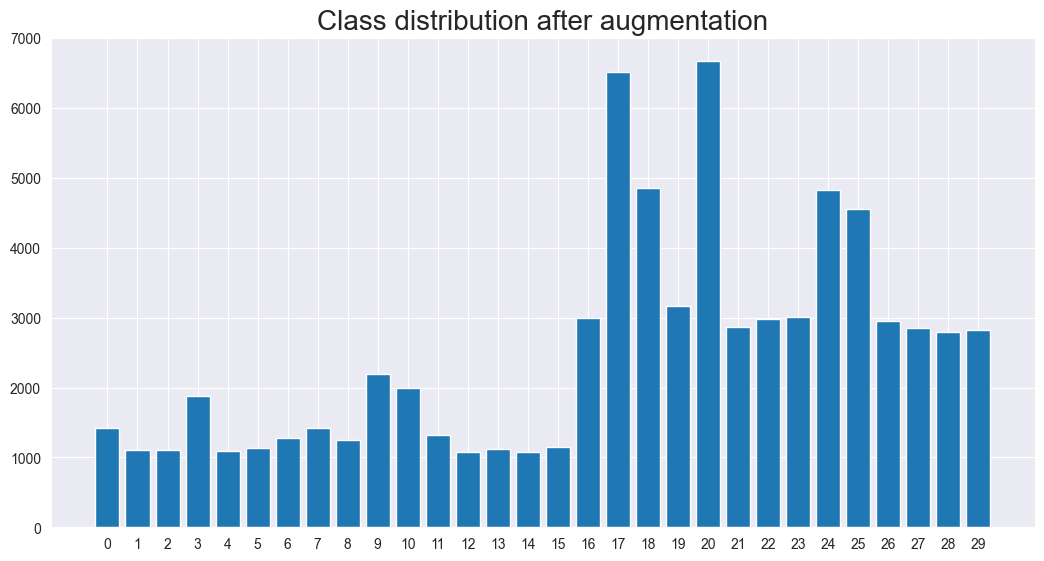

In [46]:
plt.figure(figsize=(12.7, 6.36))
plt.bar(temp.keys(), temp.values())
plt.title('Class distribution after augmentation', fontsize=20)
plt.show()

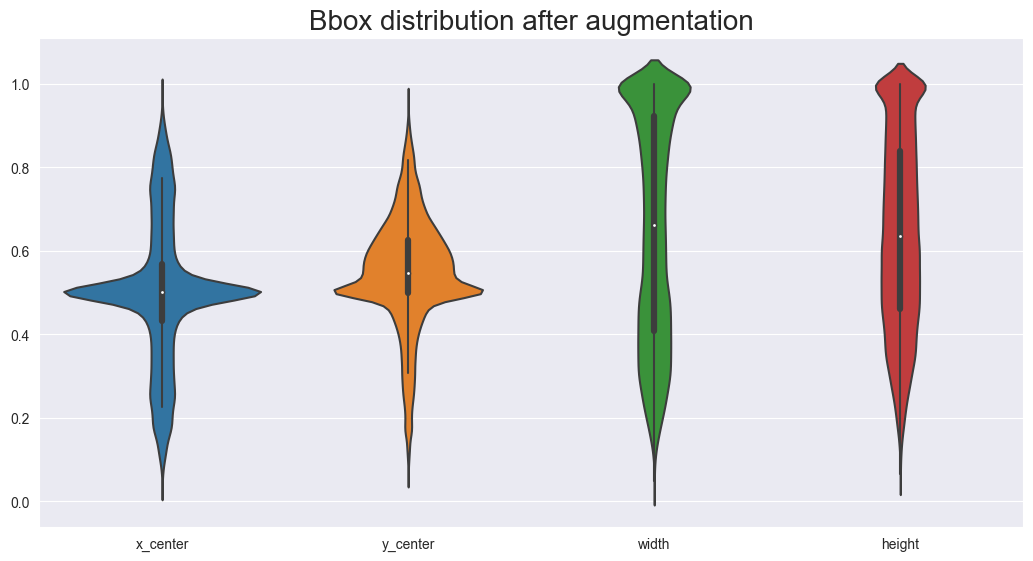

In [45]:
fig, ax = plt.subplots(figsize=(12.7, 6.36))
ax = sns.violinplot([mixed['x_center'], mixed['y_center'], mixed['width'], mixed['height']])
plt.title('Bbox distribution after augmentation', fontsize=20)
ax.set_xticklabels(mixed.columns[1:])
plt.show()

# Analysis for confusion matrix

In [53]:
bed_max = bed_count['0101']
chair_max = chair_count['011']
print(bed_max/bed_count['0010'], bed_max/bed_count['0020'], bed_max/bed_count['0011'], bed_max/bed_count['0021'], chair_max/chair_count['114'])

18.228915662650603 15.926315789473684 29.666666666666668 15.760416666666666 113.70270270270271


In [60]:
print(bed_max, chair_max)

1513 4207


In [56]:
print(bed_max, bed_count['0010'])

1513 83


In [57]:
print(bed_count['0001'], bed_count['0101'], bed_count['0001'], bed_count['0111'])

883 1513 883 942


In [59]:
print(bed_count['0010'], bed_count['0020'], bed_count['0011'], bed_count['0021'], chair_count['114'])

83 95 51 96 37
